# Maps of mortality rates.

In [1]:
import util
import pandas as pd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pathlib
from matplotlib.patches import Patch

## Loading data

In [2]:
df = pd.read_csv('data/output/df_political_without_missing_points.csv', index_col=0)

In [3]:
df

,code_municipality_7,municipality,percentual_votes_for_bolsonaro
0,1100015,Alta Floresta D'Oeste (RO),64.143709
1,1100023,Ariquemes (RO),71.790038
2,1100031,Cabixi (RO),61.414254
3,1100049,Cacoal (RO),67.890142
4,1100056,Cerejeiras (RO),72.989136
...,...,...,...
5565,5222005,Vianópolis (GO),55.767654
5566,5222054,Vicentinópolis (GO),45.224773
5567,5222203,Vila Boa (GO),28.946422
5568,5222302,Vila Propício (GO),45.194479


In [4]:
try:
    filename_map_municipalities = 'data/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = 'data/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('data/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('data/map_states_2010.geojson', driver='GeoJSON')

In [5]:
df_map_municipalities = map_municipalities.merge(df, how="left", left_on="code_muni", right_on="code_municipality_7")

In [6]:
df_map_municipalities = df_map_municipalities.loc[df_map_municipalities['name_muni'].isin(['Lagoa Mirim', 'Lagoa Dos Patos']) == False]

## Descriptive statistics

In [7]:
df.describe().round(2)

,code_municipality_7,percentual_votes_for_bolsonaro
count,5560.00,5560.00
mean,3252520.30,37.84
std,984136.75,16.66
min,1100015.00,5.51
25%,2512095.00,22.74
50%,3146057.50,39.34
75%,4118820.25,51.21
max,5300108.00,81.76


## Map visualizations

In [8]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

<ipython-input-8-14fc443e71bc>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
<ipython-input-8-14fc443e71bc>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
<ipython-input-8-14fc443e71bc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
<ipython-input-8-14fc443e71bc>:15: UserWarning: Geometry is in a geographic CRS. Results from 'c

In [9]:
df_map_municipalities.columns

Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'geometry',
       'code_municipality_7', 'municipality',
       'percentual_votes_for_bolsonaro'],
      dtype='object')

In [10]:
def plot_map(df, width=17.4, height=17.4, filename_extra='',
             column = 'percentual_votes_for_bolsonaro'):
    df = df.copy()

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(width), util.centimeter_to_inch(height)))

    missing_kwds = dict(color='#FFC0CB', label='No data')

    normal_plot = df.plot(
        column=column,
        cmap='Blues',
        legend=True,            
        legend_kwds={"label": "Votes for Bolsonaro (in %)","orientation": "horizontal","pad": -0.025},
        edgecolor="gray",            
        linewidth=linewidth_municipios,
        categorical=False,    
        missing_kwds=missing_kwds,
        ax=ax
    )

    map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax)

    map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

    for point in custom_points.keys():
        ax.text(custom_points[point].x, custom_points[point].y, point, ha='center')

    # Adding a legend entry for missing data
    missing_patch = Patch(color='#FFC0CB', label='No data')
    ax.legend(handles=[missing_patch], loc='upper center', bbox_to_anchor=(0.5, 1.025), frameon=True)    

    ax.axis("off")

    fig.tight_layout()

    fig.savefig('images/map_votes_for_bolsonaro'+filename_extra+'.png', bbox_inches="tight")    
    fig.savefig('images/map_votes_for_bolsonaro'+filename_extra+'.pdf', bbox_inches="tight")

    plt.show()

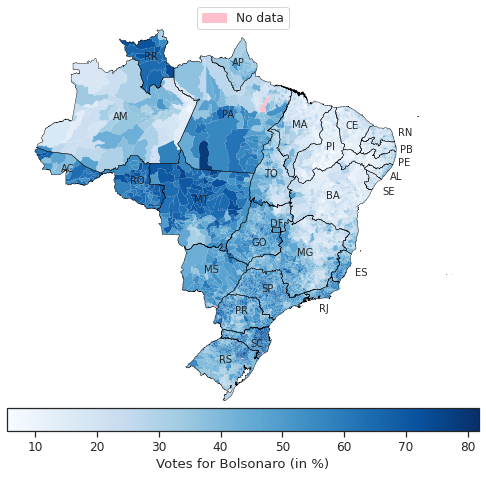

In [11]:
plot_map(df_map_municipalities)